In [60]:
import numpy as np
import matplotlib.pyplot as plt
# from modshogun import ID3ClassifierTree, RealFeatures, MulticlassLabels
from sklearn import preprocessing
import pandas
from sklearn.ensemble import RandomForestClassifier

X_train = np.genfromtxt("/Users/dharshanbj/Desktop/X_train_project2.txt",delimiter=',') # load the text file 
Y_train = np.genfromtxt("/Users/dharshanbj/Desktop/Y_train_project2.txt",delimiter=None) # load the text file 
#X_test = np.genfromtxt("/Users/dharshanbj/Desktop/X_test_project2.txt",delimiter=None) # load the text file 

X_train,Xva,Y_train,Yva=ml.splitData(X_train,Y_train,0.75)
X_test=pandas.DataFrame(Xva)
X_train=pandas.DataFrame(X_train)
# df.apply(preprocessing.LabelEncoder().fit_transform)


for col in X_test.columns.values:
    if X_test[col].dtypes=='object':
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
# from modshogun import ID3ClassifierTree, RealFeatures, MulticlassLabels
from sklearn import preprocessing
from numpy import array, concatenate
import mltools as ml

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

import pandas
from collections import defaultdict


X_train = np.genfromtxt("/Users/dharshanbj/Desktop/X_train_project2.txt",delimiter=',') # load the text file 
Y_train = np.genfromtxt("/Users/dharshanbj/Desktop/Y_train_project2.txt",delimiter=None) # load the text file 
X_test = np.genfromtxt("/Users/dharshanbj/Desktop/X_test_project2.txt",delimiter=',') # load the text file 

X_train= X_train[1:,:]
Y_train= Y_train[1:]
X_test=X_test[1:,:]


X_train,Xva,Ytr,Yva=ml.splitData(X_train,Y_train,0.75)

df=pandas.DataFrame(X_train)
df=df.apply(preprocessing.LabelEncoder().fit_transform)

df_val=pandas.DataFrame(Xva)
df_val=df_val.apply(preprocessing.LabelEncoder().fit_transform)

le = preprocessing.LabelEncoder()

#print(df.values)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(df,Ytr)

Y_predicted=neigh.predict(df_val)

Text(0.5,1,'Receiver operating characteristic')

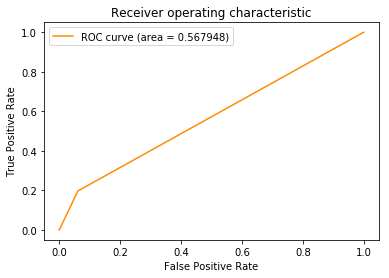

In [52]:
from sklearn.metrics import roc_curve, auc
    
fpr,tpr,_ = roc_curve(Yva, Y_predicted)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %f)'%roc_auc)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import mltools as ml
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB

X_train=pd.read_csv('/Users/dharshanbj/Desktop/X_train_project2.csv')
Y_train=pd.read_csv('/Users/dharshanbj/Desktop/Y_train_project2.csv')
X_test=pd.read_csv('/Users/dharshanbj/Desktop/X_test_project2.csv')
# X_train,X_test,Y_train,Yva=ml.splitData(X_train,Y_train,0.75)

# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

# print(X_train.head())
# X_train=X_train[0:15000:]
# Xva=X_train[15000:20000:]
# Y_train=Y_train[0:15000:]
# Yva=Y_train[15000:20000:]
#random forest

print(Xva.shape)

maxDepth=[2,5,10,15,30]
mse_training=[]
mse_validation=[]
for i in maxDepth:
    clf = RandomForestClassifier(max_depth=i)
    clf.fit(X_train,Y_train)
    yhatTest=clf.predict(Xva)
    yhatTrain=clf.predict(X_train)
    mse_training.append(mean_squared_error(Yva,yhatTest))
    mse_validation.append(mean_squared_error(Y_train,yhatTrain))


plt.plot(maxDepth,mse_training,c='red',label='MSE-Training')
plt.plot(maxDepth,mse_validation,c='green',label='MSE-Validation')
plt.legend()

# neigh = KNeighborsClassifier(n_neighbors=10,algorithm='brute',metric=machine_learning.custom_distance)
# neigh.fit(X_train.head(),Y_train.head())

# YhatTest_Rf=clf.predict(X_test)
# YhatTest_knn=neigh.predict(X_test)


# #Random Forest of size 25
# # Load data set X, Y for training the ensemble…
# m,n = X_test.shape
# # ensemble = [ None ] * 25 # Allocate space for learners
# clf = GaussianNB()
# mTest = X_test.shape[0]
# predictTe = np.zeros( (mTest, 25) )
# for i in range(25):
#     Xb,Yb=ml.bootstrapData(X_train,Y_train)
#     clf.fit(Xb, Yb)
#     predictTe[:,i] = clf.predict(Xva)
    
# predictTest = np.mean(predictTe, axis=1)

# yhatTest=clf.predict_prob(X_test)
# # print(yhatTest)

# np.savetxt('/Users/dharshanbj/Desktop/Yhat_project2_randomForest4',
# np.vstack( (np.arange(len(yhatTest)) , yhatTest) ).T,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

(0, 13)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required.

In [76]:
fpr,tpr,_ = roc_curve(Yva, Y_predicted)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %f)'%roc_auc)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import mltools as ml
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB

X_train=pd.read_csv('/Users/dharshanbj/Desktop/X_train_project2.csv')
Y_train=pd.read_csv('/Users/dharshanbj/Desktop/Y_train_project2.csv')
X_test=pd.read_csv('/Users/dharshanbj/Desktop/X_test_project2.csv')
# X_train,X_test,Y_train,Yva=ml.splitData(X_train,Y_train,0.75)




# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])



learners=[150]
for i in learners:
    clf = RandomForestClassifier(max_depth=11,min_samples_leaf=2,n_estimators=i)
    clf.fit(X_train,np.ravel(Y_train,order='C'))
    yhatTest=clf.predict_proba(X_test)
    np.savetxt('/Users/dharshanbj/Desktop/Yhat_rf_p2.txt',np.vstack( (np.arange(len(yhatTest)) , yhatTest[:,0]) ).T,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');
# X=X_train.values

# #Scaling the values
# X = scale(X)

# pca = PCA(n_components=13)

# pca.fit(X)

# #The amount of variance that each PC explains
# var= pca.explained_variance_ratio_

# #Cumulative Variance explains
# var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# plt.plot(var1)
# plt.xlabel('Principal Component')
# plt.ylabel('Cumulative Proportion of Variance Explained')
# print(X_train.head())
# Xtr=X_train[0:15000:]
# Xva=X_train[15000:20000:]
# Ytr=Y_train[0:15000:]
# Yva=Y_train[15000:20000:]
#random forest

# print(Xva)
# print(Xva.shape)

# maxDepth=[2,5,10,15,30]
# minLeaf=[2,4,8,16,32,128]

# auc_training=[]
# auc_validation=[]
# learners=[150]
# features=[2,3,4,5,6,7,8,9,10,11,12]
# minLeaf=[2,4,8,16,32,64,128,256]
# maxFeatures=[2,3,4,5,6,7,8,9,10,11,12,13,14]
# # for i in maxFeatures:
# clf = RandomForestClassifier(max_depth=11,min_samples_leaf=2,n_estimators=150,max_features=2)
# clf.fit(X_train,np.ravel(Y_train,order='C'))
# yhatTest=clf.predict(X_test)
# np.savetxt('/Users/dharshanbj/Desktop/Yhat_RF2_final.txt',np.vstack( (np.arange(len(yhatTest)) , yhatTest) ).T,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');
    

# plt.plot(minLeaf,auc_training,c='red',label='AUC-Training')
# plt.plot(minLeaf,auc_validation,c='green',label='AUC-Validation')
# plt.legend()
# plt.xlabel('Min-leaf')
# plt.ylabel('AUC')
# plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_train=pd.read_csv('/Users/dharshanbj/Desktop/X_train_project2.csv')
X=X_train.values

#Scaling the values
X = scale(X)

# pca = PCA(n_components=44)

# pca.fit(X)

# #The amount of variance that each PC explains
# var= pca.explained_variance_ratio_



ValueError: could not convert string to float: 'United-States'

In [31]:
import numpy as np

clf = RandomForestClassifier(max_depth=11,min_samples_leaf=2,n_estimators=150,max_features=12)
clf.fit(X_train,np.ravel(Y_train,order='C'))
yhatTest=clf.predict(X_test)
np.savetxt('/Users/dharshanbj/Desktop/Yhat_RF_P2_12.txt',np.vstack( (np.arange(len(yhatTest)) , yhatTest) ).T,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');


In [35]:
import numpy as np
YRandomForest1=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF_P2_6.txt",delimiter=None)
YRandomForest2=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF_P2_7.txt",delimiter=None)
YRandomForest3=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF_P2_8.txt",delimiter=None)
YRandomForest4=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF_P2_9.txt",delimiter=None)
YRandomForest5=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF_P2_10.txt",delimiter=None)
YRandomForest6=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF_P2_11.txt",delimiter=None)
YRandomForest7=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF_P2_12.txt",delimiter=None)


# YRandomForest4=np.genfromtxt("/Users/dharshanbj/Desktop/Yhat_RF5.txt",delimiter=None)
# XTest=np.genfromtxt("/Users/dharshanbj/Desktop/X_test_project1.txt",delimiter=None)
end_data=((YRandomForest5[:,1]+YRandomForest6[:,1]+YRandomForest7[:,1])/3)

#print(end_data)

np.savetxt('/Users/dharshanbj/Desktop/Yhat_merged_3.txt',
np.vstack( (np.arange(len(end_data)) , end_data) ).T,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');